In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier



In [2]:
df_loan = pd.read_csv('loan.csv')

C:\Users\108522\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_columns',None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_loan.shape

(887379, 74)

In [6]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Compulsory drop of ID type of Features
# 1) ID type features simply act as row identifiers when data get built into the database
# 2) ID can falsely become the best predictor when it ideally should not be a driving factor for the outcome
df_loan=df_loan.drop(['id','member_id','url'],axis=1)

KeyError: "['id' 'member_id' 'url'] not found in axis"

In [9]:
df_loan=df_loan.drop(['title','zip_code','addr_state','emp_title'],axis=1)

In [10]:
df_loan=df_loan.drop(['desc'],axis=1)

In [7]:
#pd.set_option('max_columns',None)
#df_loan.head()

In [11]:
df_loan.dtypes

loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
term                 object
int_rate            float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 66, dtype: object

In [9]:
# Creating a Frequency Table in Pandas for each categorical
# dataframe['categorical feature'].value_counts()  --- value_counts() function will show you which all values the categorical 
# feature will take and also how many observations are there for each of them

In [12]:
#Analyzing loan_status variable for getting a better understanding of the categories and the counts
df_loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [11]:
# Define the Dependent Variable 

In [13]:

df_loan['target']=np.where(df_loan['loan_status'].isin(['Default','Charged Off','Does not meet the credit policy. Status:Charged Off']),1,0)

## Here we are creating a target variable for us so that we can create model
## for 'Default','Charged Off','Does not meet the credit policy. Status:Charged Off', 
## the target is taken as 1 and for other values of loan status its taken as 0

In [16]:
df_loan['target'].head(15)

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    1
Name: target, dtype: int32

In [11]:
# Drop the loan_status variable since we already have target variable now.
df_loan=df_loan.drop(['loan_status'],axis=1)

In [14]:
# Calculate the default rate or event rate in the data

In [12]:
df_loan['target'].mean()

## Here our target event rate is 5.3%, which is quite less but good enough to continue. 
## If it was less we should have gone for oversampling

##Note: The default rate for analysis should be atleast 5%

0.053221904056778443

In [13]:
df_loan.shape

(887379, 72)

In [17]:
# Missing Value Analysis

In [17]:
df_loan.isnull().mean()

loan_amnt           0.000000
funded_amnt         0.000000
funded_amnt_inv     0.000000
term                0.000000
int_rate            0.000000
                      ...   
total_rev_hi_lim    0.079195
inq_fi              0.975916
total_cu_tl         0.975916
inq_last_12m        0.975916
target              0.000000
Length: 67, dtype: float64

In [19]:
#data['open_acc_6m_Rank']=pd.qcut(data['open_acc_6m'].rank(method='first').values,10,duplicates='drop').codes+1

In [18]:
# Selecting all rows and only those columns where the missing value percentage is <=25%
data=df_loan.loc[:,df_loan.isnull().mean()<=0.25]

In [21]:
data.shape

(887379, 46)

In [ ]:
# 22 Features dropped Due to more than 25% Missing Values

In [20]:
# Creating a dataset with only dependent and independent
Y=data[['target']]
X=data.drop(['target'],axis=1)

In [22]:
X.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp   

In [23]:
char=X.select_dtypes(include='object')
num=X.select_dtypes(include='number')

In [24]:
# We have 19 Categorical features
char.shape

(887379, 15)

In [25]:
# We have 30 numeric features
num.shape

(887379, 30)

In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.90,0.95,0.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1%,1800.000000,1800.000000,1600.000000,5.320000,60.650000,1.900000e+04,1.980000,0.000000,0.000000,3.000000,0.000000,3.090000e+02,2.200000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.657000e+03,3.000000e+03
5%,3600.000000,3600.000000,3500.000000,6.620000,120.420000,2.800000e+04,5.200000,0.000000,0.000000,5.000000,0.000000,2.031000e+03,13.900000,9.000000,0.000000,0.000000,343.825000,338.589000,225.348000,80.080000,0.000000,0.000000,0.000000,97.679000,0.000000,1.0,0.000000,0.000000e+00,9.173000e+03,6.000000e+03
10%,5000.000000,5000.000000,5000.000000,7.690000,166.050000,3.400000e+04,7.450000,0.000000,0.000000,6.000000,0.000000,3.418800e+03,22.300000,12.000000,0.000000,0.000000,690.150000,682.148000,440.260000,166.058000,0.000000,0.000000,0.000000,164.180000,0.000000,1.0,0.000000,0.000000e+00,1.456300e+04,8.400000e+03
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04


In [26]:
num.isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000005
dti                           0.000000
delinq_2yrs                   0.000033
inq_last_6mths                0.000033
open_acc                      0.000033
pub_rec                       0.000033
revol_bal                     0.000000
revol_util                    0.000566
total_acc                     0.000033
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000163
policy_code              

In [26]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

## here we are trying to remove 1 percentile from beginning and 1 from end.

In [27]:
num=num.apply(lambda x : outlier_cap(x))

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

## Simpleimputer basically helps to replace the missing values with a central tendency value maybe mean, median or mode which is given in strategy
## we create a variable imputer. So, if lets say 5% of values are missing in a column, it will take mean of 95% available 
## value and assign the mean value for these 5 % missing values.

In [39]:
num_1.isnull().mean()

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

# Replace the missing valus in Categorical using the Mode or the Most Frequent Strategy
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [30]:
char_1=char.fillna(0)

In [31]:
char_1.isnull().mean()

term                   0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
pymnt_plan             0.0
purpose                0.0
earliest_cr_line       0.0
initial_list_status    0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

In [32]:
# To avoid discrimation an enable fair lending, we are not using any title variables are risk identifier factors
char_1=char_1.drop(['issue_d','sub_grade','last_credit_pull_d','earliest_cr_line','last_pymnt_d'],axis=1)

In [36]:
char_1.shape

(887379, 10)

In [ ]:
# 10 Categorical Features droppping based on Fair Lending Considerations

In [31]:
# Joining back the target  variable and exporting the pivot table for a BiVariate Analysis
#categorical_variable_chk=pd.concat([Y,char_1],axis=1,join='inner')
#categorical_variable_chk.to_csv('C:/Users/aksin52/Documents/My Webinars/Credit Risk Datasets and Projects/Lending Data and Project/lending-club-loan-data/categorical_data_chk.csv')

In [41]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

## Here what we are trying to do is . We are trying to convert the continuous values of numerical columns into a discrete values of range 0 to 9
## ie. the raws havinf percentile values less than 10 will get rank 0, above 10 and less than 20 percentile will get rank 1 and so on
## Please see the below code for more understanding

,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,pub_rec_Rank,revol_bal_Rank,revol_util_Rank,total_acc_Rank,out_prncp_Rank,out_prncp_inv_Rank,total_pymnt_Rank,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank,tot_coll_amt_Rank,tot_cur_bal_Rank,total_rev_hi_lim_Rank
0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,5.0,5.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0
1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
2,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,6.0,6.0
3,3.0,3.0,3.0,5.0,4.0,2.0,6.0,0.0,1.0,4.0,0.0,2.0,0.0,8.0,0.0,0.0,7.0,7.0,8.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,6.0,6.0
4,0.0,0.0,0.0,4.0,0.0,6.0,5.0,0.0,0.0,8.0,0.0,8.0,4.0,8.0,0.0,0.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0


In [40]:
num_1['loan_amnt'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

## If we consider this , the raws in loan amnt column having value less than 5000 will get rank 0, below 7175 but above 5000
## will get rank 1 and so on

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
10%        5000.000000
20%        7175.000000
30%        9600.000000
40%       11000.000000
50%       13000.000000
60%       15000.000000
70%       18450.000000
80%       21600.000000
90%       28000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [79]:
X_bin_combined['target'][X_bin_combined['int_rate_Rank']==9].mean()

0.1269671941844736

In [67]:
X_bin_combined.head()

,target,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,pub_rec_Rank,revol_bal_Rank,revol_util_Rank,total_acc_Rank,out_prncp_Rank,out_prncp_inv_Rank,total_pymnt_Rank,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank,tot_coll_amt_Rank,tot_cur_bal_Rank,total_rev_hi_lim_Rank
0,0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,5.0,5.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0
1,1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
2,0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,6.0,6.0
3,0,3.0,3.0,3.0,5.0,4.0,2.0,6.0,0.0,1.0,4.0,0.0,2.0,0.0,8.0,0.0,0.0,7.0,7.0,8.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,6.0,6.0
4,0,0.0,0.0,0.0,4.0,0.0,6.0,5.0,0.0,0.0,8.0,0.0,8.0,4.0,8.0,0.0,0.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0


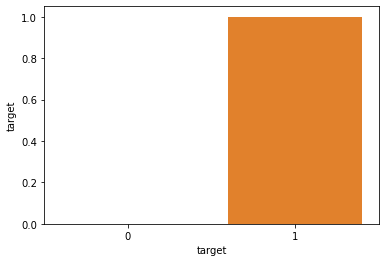

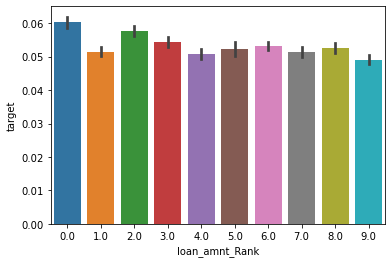

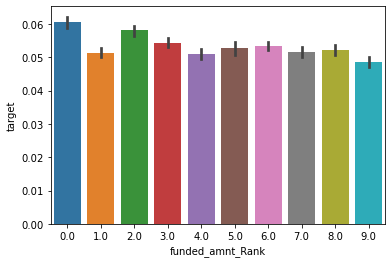

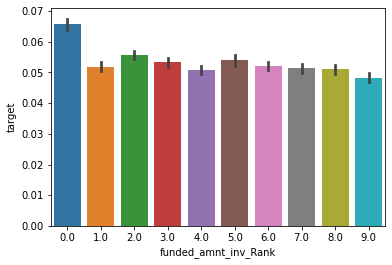

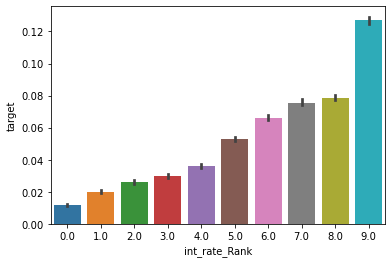

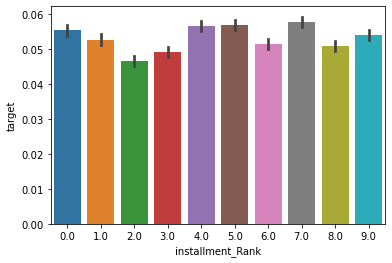

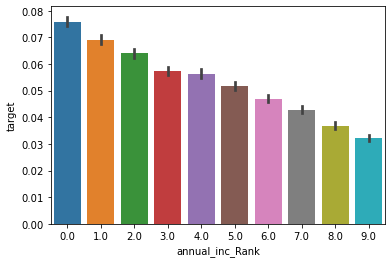

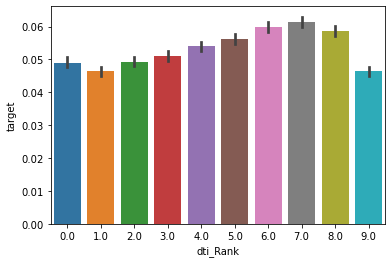

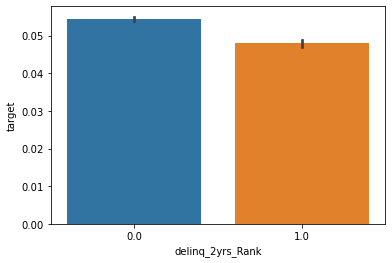

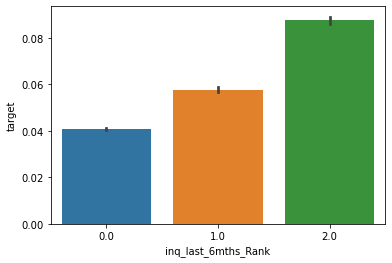

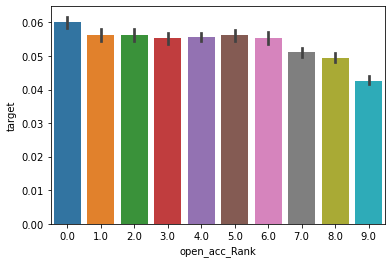

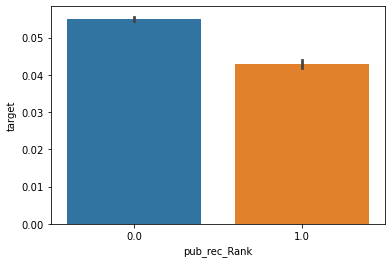

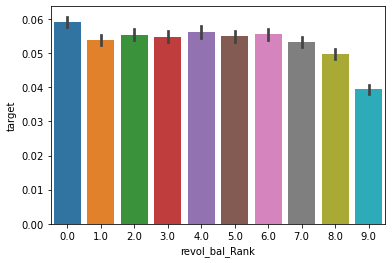

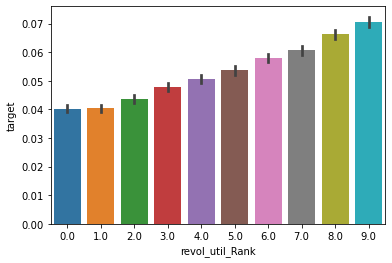

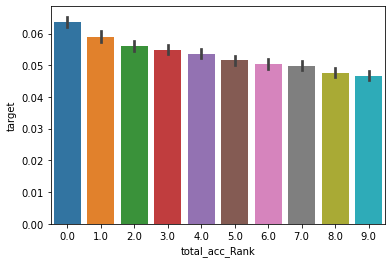

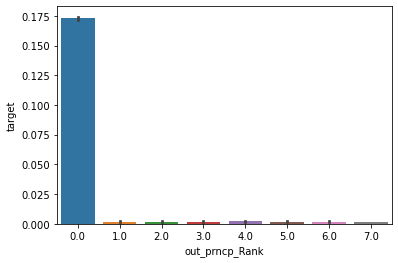

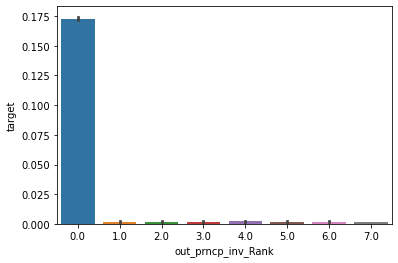

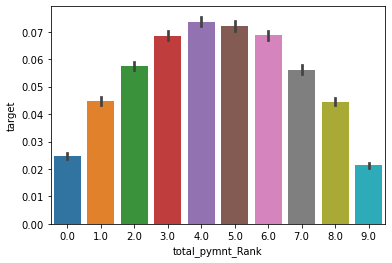

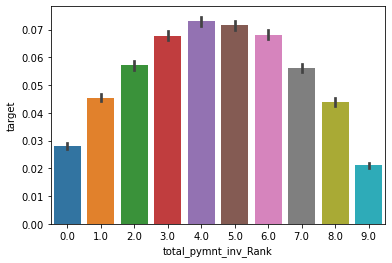

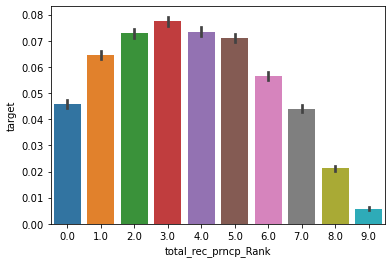

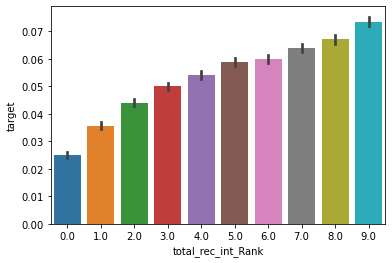

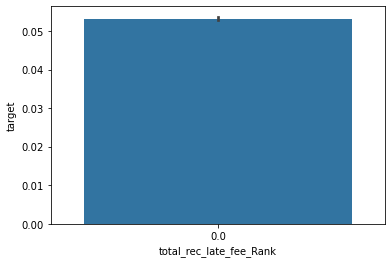

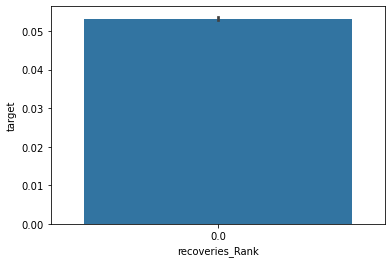

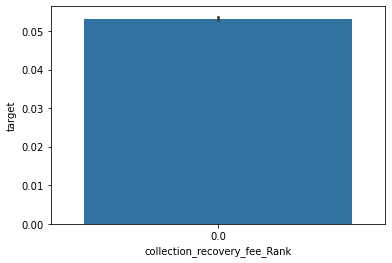

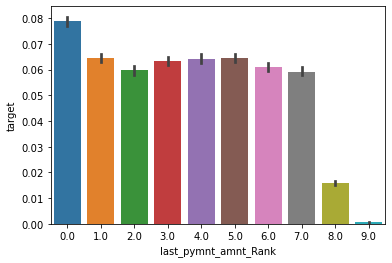

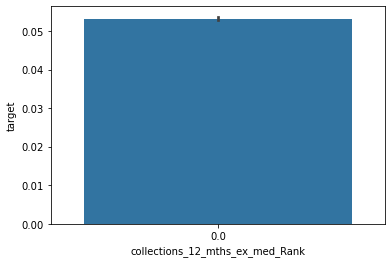

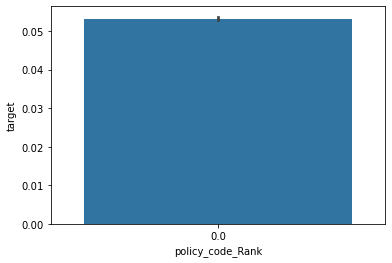

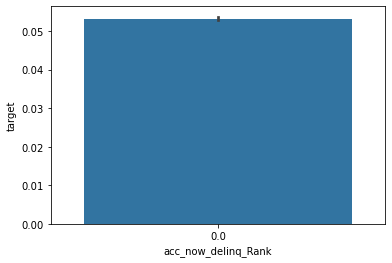

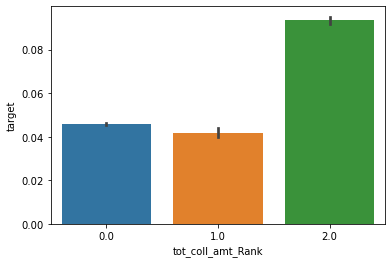

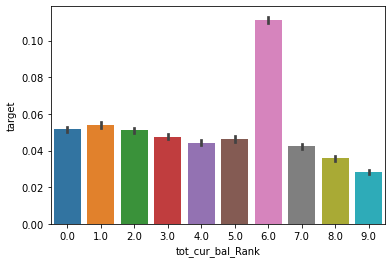

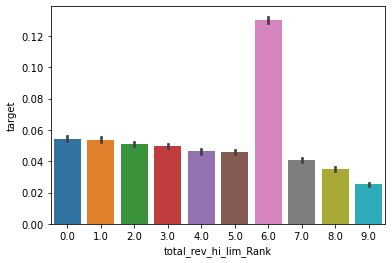

In [42]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
for col in (X_bin_combined.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

## Here we are trying to find out each rank ie. 0 to 9 has what percent of target values ie either 
## I am still confused about the values that is coming against each rank like 0.06 etc-+
## The average value of target is plotted against each rank
# The code used to plot thie y value for these graphs is mentioned below
# X_bin_combined['target'][X_bin_combined['int_rate_Rank']==9].mean()

In [63]:
# Select K Best for Numerical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=15)
X_new = selector.fit_transform(num_1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [64]:
select_features_df_num.loc[:0]

,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,4975.0,24000.0,13648.0,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,171.62,225.70261,139458.189336,32068.620045


In [65]:
select_features_df_num.dtypes

funded_amnt_inv            float64
annual_inc                 float64
revol_bal                  float64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
tot_coll_amt               float64
tot_cur_bal                float64
total_rev_hi_lim           float64
dtype: object

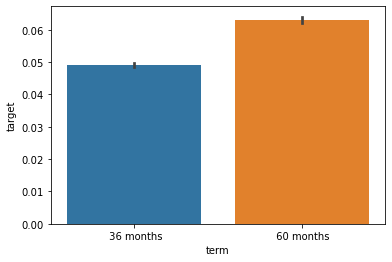

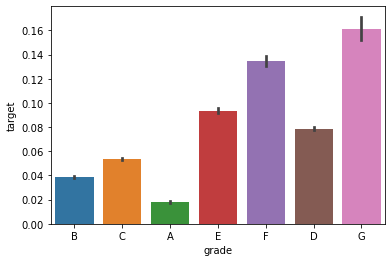

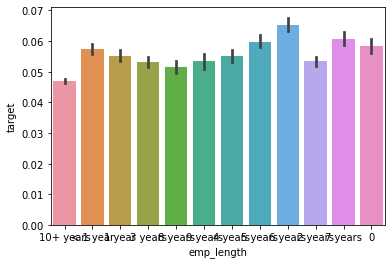

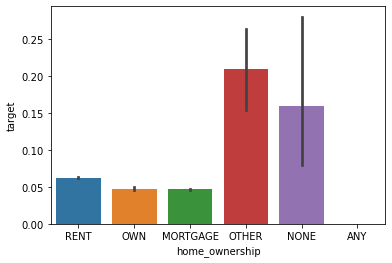

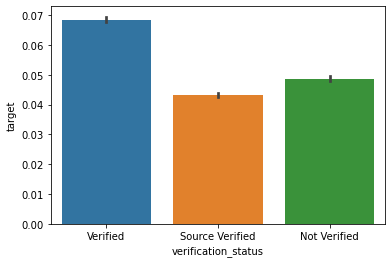

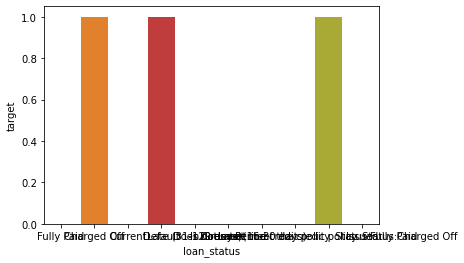

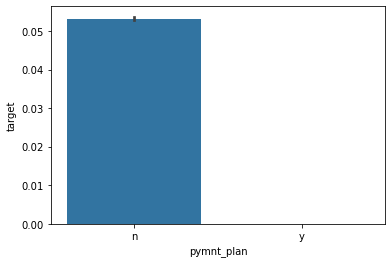

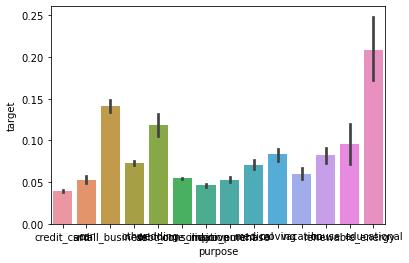

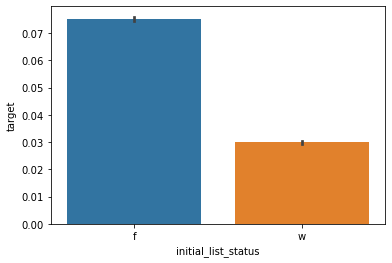

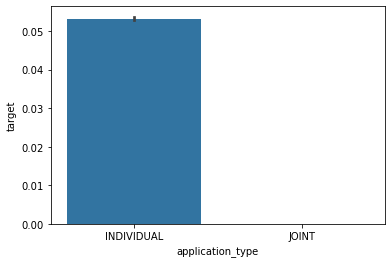

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char_1],axis=1,join='inner')

from numpy import mean
for col in (char_1.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [80]:
# Steps to regroup categorical features in order to achieve linear discrimination
# These levels to group have been discovered through the pivot analysis
char_1['purpose_1']=np.where(char_1['purpose'].isin(['other','medical','vacation','debt_consolidation','car','major_purchase','home_improvement','credit_card']),'others',char['purpose'])           
char_1['verified_1']=np.where(char_1['verification_status'].isin(['Source Verified','Verified']),'Verified',char_1['verification_status'])
char_1['home_own_1']=np.where(char_1['home_ownership'].isin(['OWN','MORTGAGE']),'OWN',
                     np.where(char_1['home_ownership'].isin(['RENT']),'RENT','OTHER'))
char_1['term_1']=np.where(char_1['term'].isin(['60 months']),'60','30')

## Here we are trying to provide same value for few of the different values and making a new characetr dataframe.

In [94]:
char_1

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,initial_list_status,application_type,purpose_1,verified_1,home_own_1,term_1
0,36 months,B,10+ years,RENT,Verified,Fully Paid,n,credit_card,f,INDIVIDUAL,others,Verified,RENT,30
1,60 months,C,< 1 year,RENT,Source Verified,Charged Off,n,car,f,INDIVIDUAL,others,Verified,RENT,30
2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,n,small_business,f,INDIVIDUAL,small_business,Not Verified,RENT,30
3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,n,other,f,INDIVIDUAL,others,Verified,RENT,30
4,60 months,B,1 year,RENT,Source Verified,Current,n,other,f,INDIVIDUAL,others,Verified,RENT,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36 months,B,8 years,RENT,Verified,Current,n,debt_consolidation,f,INDIVIDUAL,others,Verified,RENT,30
887375,36 months,B,10+ years,MORTGAGE,Verified,Current,n,home_improvement,f,INDIVIDUAL,others,Verified,OWN,30
887376,60 months,D,5 years,RENT,Verified,Current,n,debt_consolidation,w,INDIVIDUAL,others,Verified,RENT,30
887377,60 months,E,1 year,RENT,Source Verified,Current,n,debt_consolidation,w,INDIVIDUAL,others,Verified,RENT,30


In [81]:
char_2=char_1.loc[:,['purpose_1','verified_1','home_own_1','term_1','grade','emp_length','pymnt_plan','application_type']]

## for character dataframe the columns that will be really used for modelling are only taken here.

In [95]:
char_2.head()

,purpose_1,verified_1,home_own_1,term_1,grade,emp_length,pymnt_plan,application_type
0,others,Verified,RENT,30,B,10+ years,n,INDIVIDUAL
1,others,Verified,RENT,30,C,< 1 year,n,INDIVIDUAL
2,small_business,Not Verified,RENT,30,C,10+ years,n,INDIVIDUAL
3,others,Verified,RENT,30,C,10+ years,n,INDIVIDUAL
4,others,Verified,RENT,30,B,1 year,n,INDIVIDUAL


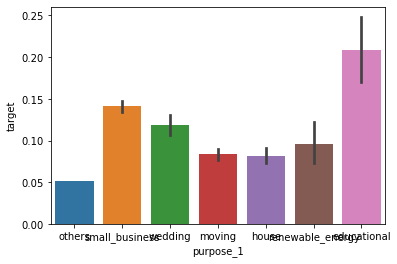

In [93]:
check=pd.concat([Y,char_2],axis=1,join="inner")
ax=sns.barplot(x="purpose_1", y="target",data=check, estimator=mean )

In [83]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_2, drop_first = True)

## pd.get_dummies helps to convert the categorical variables into binary variable by creating some new columns. 
## This is similar to one hot end coding

In [96]:
X_char_dum.head()

,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verified_1_Verified,home_own_1_OWN,home_own_1_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT
0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
X_char_dum.shape

(887379, 28)

In [85]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)
X_new_1 = selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

## Here we are trying to get 25 best features out of 28 using kbest.

In [86]:
select_features_df_char.loc[:0]

,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verified_1_Verified,home_own_1_OWN,home_own_1_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT
0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [97]:
select_features_df_char.shape

(887379, 25)

In [88]:
num_additional=num_1.loc[:,['int_rate','inq_last_6mths']]

In [44]:
num_additional.head()

,int_rate,inq_last_6mths
0,10.65,1.0
1,15.27,4.0
2,15.96,2.0
3,13.49,1.0
4,12.69,0.0


In [89]:
# Bringing it together
X_all=pd.concat([select_features_df_char,select_features_df_num,num_additional],axis=1,join="inner")

In [90]:
Y['target'].value_counts()

0    840151
1     47228
Name: target, dtype: int64

In [100]:
Y.value_counts()

target
0         840151
1          47228
dtype: int64

In [91]:
Y.mean()

target    0.053222
dtype: float64

In [92]:
# Split the data between Train and Testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [ ]:
## V IMP: after splitting the data into trainig and testing how to guarantee that the data has been split in the correct manner.
## Check the mean of training and testing feature values with main dataset feature values. It should be almost equal.
## If not change the random state value and try again. 
## Checking is done below

In [102]:
X_train.shape

(621165, 42)

In [103]:
X_test.shape

(266214, 42)

In [50]:
X_train['revol_bal'].describe()

count    621165.000000
mean      16213.795386
std       15199.432137
min         309.000000
25%        6440.000000
50%       11872.000000
75%       20813.000000
max       93410.660000
Name: revol_bal, dtype: float64

In [104]:
X_train['int_rate'].describe()

count    621165.000000
mean         13.244447
std           4.379019
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

In [105]:
X_test['int_rate'].describe()

count    266214.000000
mean         13.252090
std           4.388509
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

In [51]:
X_test['revol_bal'].describe()

count    266214.000000
mean      16220.211949
std       15176.915439
min         309.000000
25%        6452.000000
50%       11881.000000
75%       20872.000000
max       93410.660000
Name: revol_bal, dtype: float64

In [53]:
X_all['revol_bal'].describe()

count    887379.000000
mean      16215.720357
std       15192.672358
min         309.000000
25%        6443.000000
50%       11875.000000
75%       20829.000000
max       93410.660000
Name: revol_bal, dtype: float64

In [54]:
y_train.mean()

target    0.053195
dtype: float64

In [55]:
y_test.mean()

target    0.053284
dtype: float64

In [ ]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [106]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0, max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=20,rounded=True,feature_names=X_all.columns)
plt.show()

In [107]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0, max_depth=4)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [108]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
recoveries,4.322197e-01
collection_recovery_fee,2.033006e-01
out_prncp_inv,1.037137e-01
out_prncp,8.492149e-02
last_pymnt_amnt,4.354569e-02
total_rec_prncp,4.231924e-02
total_pymnt_inv,2.287374e-02
funded_amnt_inv,1.922073e-02
total_pymnt,1.373551e-02
int_rate,9.412140e-03


In [117]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(random_state=0,max_depth=4)
clf.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=0)

import pandas as pd
feature_importances=pd.DataFrame(clf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [59]:
# Building a XGBoost Model
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

ValueError: feature_names must be string, and may not contain [, ] or <

In [118]:
# Model Evaluation
y_pred=clf.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
# y_pred_xgb=xgb.predict(X_test)


In [111]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [112]:
y_pred_tree=dtree.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9885543209598293
Precision 0.9939684229199929
Recall 0.7899894254494184
f1_score 0.8803173730311482


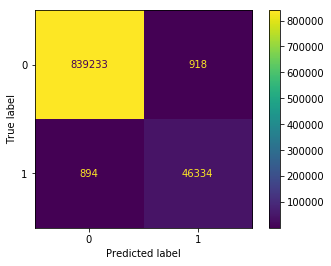

In [63]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [113]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9749299435792257
Precision 1.0
Recall 0.5295029961226648
f1_score 0.6923856932153393


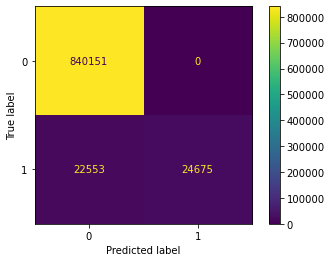

In [114]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [119]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.997302921709602
Precision 0.998962578732864
Recall 0.950370109270356
f1_score 0.9740606936416185


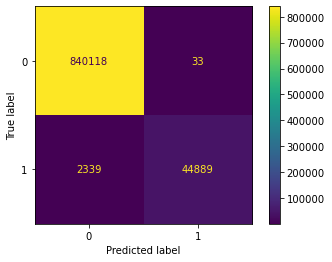

In [120]:
metrics.plot_confusion_matrix(clf,X_all,Y)

In [72]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision",metrics.precision_score(y_test,y_pred_xgb))
print("Recall",metrics.recall_score(y_test,y_pred_xgb))
print("f1_score",metrics.f1_score(y_test,y_pred_xgb))

Accuracy: 0.9971789612867843
Precision 0.9944060061828353
Recall 0.9524145223827988
f1_score 0.9729574016059919


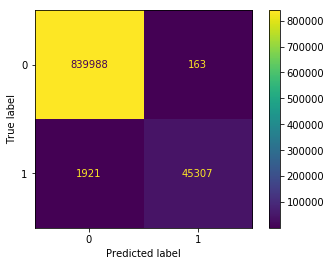

In [73]:
metrics.plot_confusion_matrix(xgb,X_all,Y)

In [ ]:
# Lorenz Curve

In [ ]:
#Decsion Tree Lorenz Curve

In [122]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.506998,44990.0,44990.0,0.952613,0.952613,0.100000,0.100000,1,9.526118
1,9,88738,0.013106,1163.0,46153.0,0.024625,0.977238,0.100000,0.200000,2,4.886185
2,8,88738,0.002738,243.0,46396.0,0.005145,0.982383,0.100000,0.300000,3,3.274607
3,7,88738,0.002558,227.0,46623.0,0.004806,0.987190,0.100000,0.400000,4,2.467972
4,6,88737,0.001657,147.0,46770.0,0.003113,0.990302,0.099999,0.499999,5,1.980607
5,5,88738,0.001792,159.0,46929.0,0.003367,0.993669,0.100000,0.600000,6,1.656116
6,4,88738,0.001386,123.0,47052.0,0.002604,0.996273,0.100000,0.700000,7,1.423248
7,3,88738,0.000868,77.0,47129.0,0.001630,0.997904,0.100000,0.800000,8,1.247380
8,2,88738,0.000124,11.0,47140.0,0.000233,0.998137,0.100000,0.900000,9,1.109041
9,1,88738,0.000992,88.0,47228.0,0.001863,1.000000,0.100000,1.000000,10,1.000000


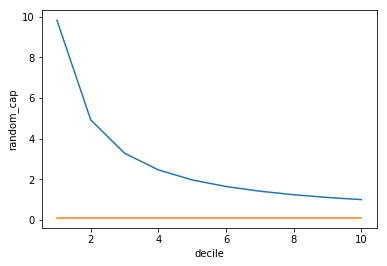

In [79]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [ ]:
df.groupby('P_Rank_RF')['y_pred_P'].agg(['min','max'])

In [124]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.512216,45453.0,45453.0,0.962416,0.962416,0.100000,0.100000,1,9.624153
1,9,88738,0.006029,535.0,45988.0,0.011328,0.973744,0.100000,0.200000,2,4.868716
2,8,88738,0.000924,82.0,46070.0,0.001736,0.975481,0.100000,0.300000,3,3.251598
3,7,88738,0.004215,374.0,46444.0,0.007919,0.983400,0.100000,0.400000,4,2.458496
4,6,88737,0.003065,272.0,46716.0,0.005759,0.989159,0.099999,0.499999,5,1.978320
5,5,88738,0.002209,196.0,46912.0,0.004150,0.993309,0.100000,0.600000,6,1.655516
6,4,88738,0.001488,132.0,47044.0,0.002795,0.996104,0.100000,0.700000,7,1.423006
7,3,88738,0.000935,83.0,47127.0,0.001757,0.997861,0.100000,0.800000,8,1.247327
8,2,88738,0.000609,54.0,47181.0,0.001143,0.999005,0.100000,0.900000,9,1.110006
9,1,88738,0.000530,47.0,47228.0,0.000995,1.000000,0.100000,1.000000,10,1.000000


In [127]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

## We care most about 3rd docile

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.518279,45991.0,45991.0,0.973808,0.973808,0.100000,0.100000,1,9.738068
1,9,88738,0.004744,421.0,46412.0,0.008914,0.982722,0.100000,0.200000,2,4.913605
2,8,88738,0.003246,288.0,46700.0,0.006098,0.988820,0.100000,0.300000,3,3.296064
3,7,88738,0.002197,195.0,46895.0,0.004129,0.992949,0.100000,0.400000,4,2.482370
4,6,88737,0.001352,120.0,47015.0,0.002541,0.995490,0.099999,0.499999,5,1.990982
5,5,88738,0.001048,93.0,47108.0,0.001969,0.997459,0.100000,0.600000,6,1.662433
6,4,88738,0.000496,44.0,47152.0,0.000932,0.998391,0.100000,0.700000,7,1.426273
7,3,88738,0.000473,42.0,47194.0,0.000889,0.999280,0.100000,0.800000,8,1.249100
8,2,88738,0.000282,25.0,47219.0,0.000529,0.999809,0.100000,0.900000,9,1.110900
9,1,88738,0.000101,9.0,47228.0,0.000191,1.000000,0.100000,1.000000,10,1.000000


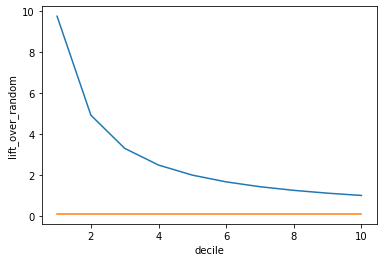

In [128]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

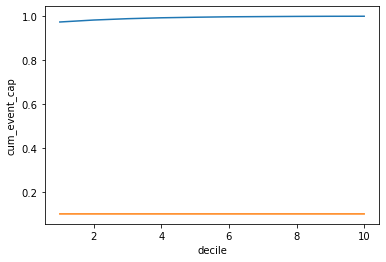

In [129]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

## here its a lorenz curve

In [33]:
x=[15, 18, 21, 22, 26, 28, 28]
df=pd.DataFrame(x)
df.quantile(0.5)
df.var()t

0    25.285714
dtype: float64

In [31]:
# Project Conclusion :- 
# Create a decision tree and show it to stakeholders. This will create awareness about the kind of rules that a Tree might 
# come up with
# Now speak about the benefit of ensembles and how they achieve a higher degress of robustness than a single tree
# Now is the time to show that the ensemble is as good if not better than the decison tree
# This way you can first sell the idea of a tree based solution and then sell the final product which is an ensemble of the
# idea you have already sold(decision tree)